<a href="https://colab.research.google.com/github/luizahelenalucena/Trabalho-CEP---Luiza-Helena/blob/main/LuizaHelena_CEP_Prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prova 1 - CEP**

Implementação das Cartas de Controle X̄ e R

Disciplina: Controle Estatístico de Processos

Autora: Luiza Helena Oliveira de Lucena - 211038404

Data: Outubro/2025



**1) Importação das bibliotecas**

In [1]:
import pandas as pd #importa a biblioteca Pandas, que é usada para manipulação e análise de dados.
import numpy as np #importa a biblioteca NumPy, voltada para cálculos numéricos e manipulação de arrays (vetores e matrizes).
import matplotlib.pyplot as plt #importa o módulo pyplot da biblioteca Matplotlib, usado para criar gráficos.
#Em todos coloquei o apelido da biblioteca, para encurtar o código.

**2) Carregamento dos Dados**

In [2]:
# Objetivo: carregar o arquivo CSV hospedado no GitHub contendo os dados de alarmes.

url = "https://raw.githubusercontent.com/luizahelenalucena/Prova-CEP---Luiza-Helena/refs/heads/main/diametrosinterno_aneisdepistaovf.csv"
df = pd.read_csv(url)
df = pd.read_csv(url, sep=',') # O separador ; foi usado para garantir a leitura correta das colunas.

try:
    df = pd.read_csv(url, sep=',', decimal='.', encoding='utf-8')
    print("✅ Base de dados carregada automaticamente do GitHub!")
    print(df.head())
except Exception as e:
    print("❌ Erro ao carregar a base de dados do GitHub:")
    print(str(e))
    df = None

# Verificação de carregamento

if df is not None:
    print(f"\nA base contém {df.shape[0]} linhas e {df.shape[1]} colunas.")
else:
    raise SystemExit("Encerrando execução por falha no carregamento da base.")

✅ Base de dados carregada automaticamente do GitHub!
   Número da Amostra  Amostra_1  Amostra_2  Amostra_3  Amostra_4  Amostra_5
0                  1     74.030     74.002     74.019     73.992     74.008
1                  2     73.995     73.992     74.001     74.011     74.004
2                  3     73.988     74.024     74.021     74.005     74.002
3                  4     74.002     73.996     73.993     74.015     74.009
4                  5     73.992     74.007     74.015     73.989     74.014

A base contém 25 linhas e 6 colunas.


In [3]:
# Utilizado para retirar a coluna de identidicação da amostra

if 'Número da Amostra' in df.columns:
    df = df.drop(columns=['Número da Amostra'])
    print("Coluna 'Número da Amostra' removida (identificador de amostra).\n")

print("Prévia dos dados carregados:")
print(df.head(), "\n")
print(f"Dimensões do dataset: {df.shape[0]} amostras x {df.shape[1]} colunas\n")


Coluna 'Número da Amostra' removida (identificador de amostra).

Prévia dos dados carregados:
   Amostra_1  Amostra_2  Amostra_3  Amostra_4  Amostra_5
0     74.030     74.002     74.019     73.992     74.008
1     73.995     73.992     74.001     74.011     74.004
2     73.988     74.024     74.021     74.005     74.002
3     74.002     73.996     73.993     74.015     74.009
4     73.992     74.007     74.015     73.989     74.014 

Dimensões do dataset: 25 amostras x 5 colunas



**3) Cáculo da estatística por amostra**

In [4]:
# Seleciona apenas as colunas de medidas
col_medidas = df.select_dtypes(include=[np.number]).columns.tolist()
n = len(col_medidas)  # número de medições por amostra
print(f"Número de medições por amostra (n): {n}")

# Calcula média e amplitude por amostra
df["Xbar"] = df[col_medidas].mean(axis=1)
df["R"] = df[col_medidas].max(axis=1) - df[col_medidas].min(axis=1)


Número de medições por amostra (n): 5


**4) Cálculo dos Limites de Controle para Carta X-barra**

In [5]:
# Média das médias e média das amplitudes
Xbar_bar = df["Xbar"].mean()
R_bar = df["R"].mean()

# Constantes para n = 5 (tamanho da amostra)
A2 = 0.577
D3 = 0
D4 = 2.114

# Cálculo dos limites de controle da Carta X̄
LSC_X = Xbar_bar + A2 * R_bar
LIC_X = Xbar_bar - A2 * R_bar
LC_X = Xbar_bar

print("Limites de Controle - Carta X̄:")
print(f"Média das médias (X̄̄): {Xbar_bar:.4f}")
print(f"Amplitude média (R̄): {R_bar:.4f}")
print(f"LSC (Limite Superior de Controle): {LSC_X:.4f}")
print(f"LIC (Limite Inferior de Controle): {LIC_X:.4f}")
print(f"LC (Linha Central): {LC_X:.4f}\n")

Limites de Controle - Carta X̄:
Média das médias (X̄̄): 74.0012
Amplitude média (R̄): 0.0232
LSC (Limite Superior de Controle): 74.0146
LIC (Limite Inferior de Controle): 73.9878
LC (Linha Central): 74.0012



**5) Cálculo dos Limites de Controle para Carta R**

In [6]:
# Cálculo dos limites da Carta R
LSC_R = D4 * R_bar
LIC_R = D3 * R_bar  # como D3=0, o limite inferior será 0
LC_R = R_bar

print("Limites de Controle - Carta R:")
print(f"LSC (Limite Superior de Controle): {LSC_R:.4f}")
print(f"LIC (Limite Inferior de Controle): {LIC_R:.4f}")
print(f"LC (Linha Central): {LC_R:.4f}\n")

Limites de Controle - Carta R:
LSC (Limite Superior de Controle): 0.0491
LIC (Limite Inferior de Controle): 0.0000
LC (Linha Central): 0.0232



**6) Construção da Carta X-barra**

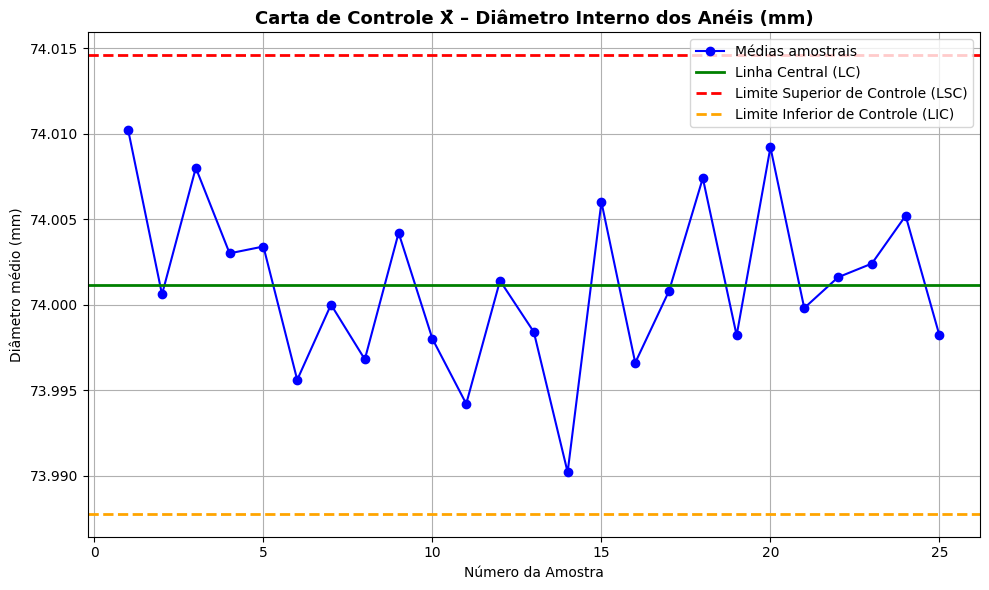

In [10]:
plt.figure(figsize=(10,6)) # Cria um gráfico com tamanho de 10 polegadas de largura por 6 de altura

# Plota a linha das médias amostrais (valores da coluna 'Xbar') ao longo do índice das amostras
# O marcador 'o' coloca pontos nos valores, a linha é sólida ('-') e azul
plt.plot(df.index + 1, df["Xbar"], marker='o', linestyle='-', color='blue', label='Médias amostrais')

# Adiciona a linha central (LC) da carta de controle, em verde e linha contínua
plt.axhline(LC_X, color='green', linestyle='-', linewidth=2, label='Linha Central (LC)')

# Adiciona o limite superior de controle (LSC), em vermelho e linha tracejada
plt.axhline(LSC_X, color='red', linestyle='--', linewidth=2, label='Limite Superior de Controle (LSC)')

# Adiciona o limite inferior de controle (LIC), em laranja e linha tracejada
plt.axhline(LIC_X, color='orange', linestyle='--', linewidth=2, label='Limite Inferior de Controle (LIC)')

# Define o título do gráfico com fonte maior e em negrito
plt.title("Carta de Controle X̄ – Diâmetro Interno dos Anéis (mm)", fontsize=13, fontweight='bold')

# Define o rótulo do eixo X
plt.xlabel("Número da Amostra")

# Define o rótulo do eixo Y
plt.ylabel("Diâmetro médio (mm)")

# Exibe a legenda explicando as linhas do gráfico
plt.legend()

# Ativa a grade no gráfico para facilitar a leitura dos valores
plt.grid(True)

# Ajusta automaticamente o layout para evitar sobreposição de elementos (título, legenda etc.)
plt.tight_layout()

# Exibe o gráfico final na tela
plt.show()

**7) Construção da Carta R**

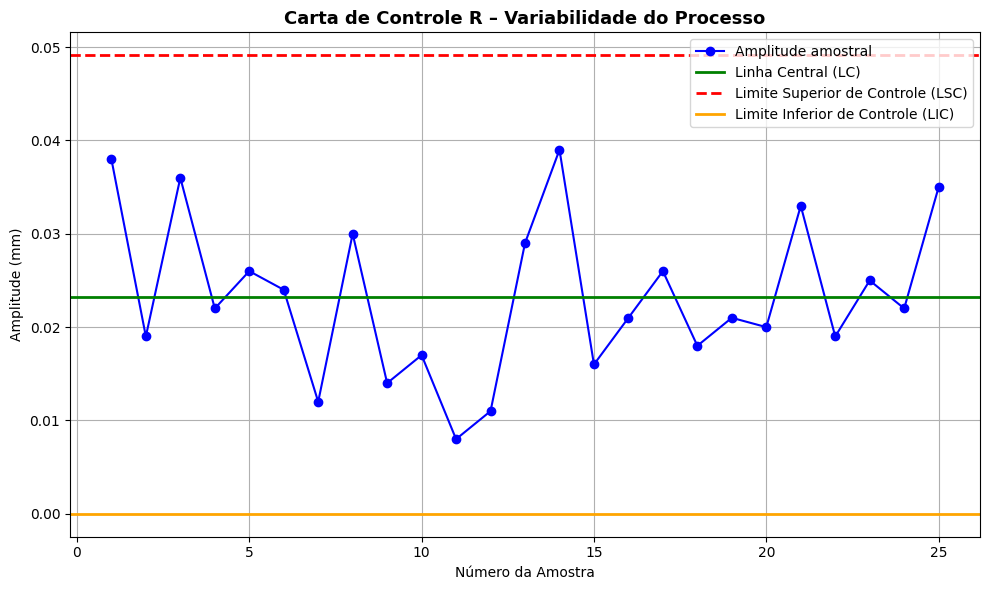

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.index + 1, df["R"], marker='o', linestyle='-', color='blue', label='Amplitude amostral')
plt.axhline(LC_R, color='green', linestyle='-', linewidth=2, label='Linha Central (LC)')
plt.axhline(LSC_R, color='red', linestyle='--', linewidth=2, label='Limite Superior de Controle (LSC)')
plt.axhline(LIC_R, color='orange', linestyle='-', linewidth=2, label='Limite Inferior de Controle (LIC)')

plt.title("Carta de Controle R – Variabilidade do Processo", fontsize=13, fontweight='bold')
plt.xlabel("Número da Amostra")
plt.ylabel("Amplitude (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**8) Análise de Pontos Fora de Controle**

In [9]:
# Pontos fora de controle na Carta X̄
fora_X = df[(df["Xbar"] > LSC_X) | (df["Xbar"] < LIC_X)][["Xbar"]]

# Pontos fora de controle na Carta R
fora_R = df[(df["R"] > LSC_R) | (df["R"] < LIC_R)][["R"]]

print("Pontos fora de controle - Carta X̄:")
if fora_X.empty:
    print("Nenhum ponto fora dos limites de controle.\n")
else:
    print(fora_X)

print("Pontos fora de controle - Carta R:")
if fora_R.empty:
    print("Nenhum ponto fora dos limites de controle.\n")
else:
    print(fora_R)

Pontos fora de controle - Carta X̄:
Nenhum ponto fora dos limites de controle.

Pontos fora de controle - Carta R:
Nenhum ponto fora dos limites de controle.

